ㄴㄴㄴㄴ

In [1]:
install.packages("zoo")
install.packages("xts")
install.packages("tsibble")
install.packages("dplyr")
install.packages("tidyverse")
install.packages("readxl")
install.packages("ggplot2")
install.packages("timetk")
install.packages("tibbletime")
install.packages("forcast")
install.packages("readr")
install.packages("stringr")
install.packages("doBy")
install.packages("scales")
install.packages("corrplot")
install.packages("gridExtra")
install.packages("DataExplorer")
install.packages("ranger")
install.packages("caret")
install.packages("descr")
install.packages("ggthemes")
install.packages("reshape2")
install.packages("lubridate")
install.packages("viridis")
install.packages("ggrepel")
install.packages("corrplot")
install.packages("skimr")
install.packages("plotly")
install.packages("data.table")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘forcast’ is not available for this ver

In [2]:
library(zoo)
library(xts)
library(tsibble)
library(dplyr)
library(tidyverse)
library(readxl) 
library(ggplot2)
library(timetk)
library(tibbletime)
library(forecast)
library(readr)
library(stringr) 
library(doBy)
library(scales)
#library(RColorBrewer)
library(corrplot)
#library(randomForest)
library(gridExtra)
library(DataExplorer)
#library(lightgbm)
#library(xgboost)
library(ranger)
library(caret)
library(descr)
library(ggthemes)
library(reshape2)
library(lubridate)
library(viridis)
library(ggrepel)
library(corrplot)
library(caret)
library(skimr)
library(plotly)
library(data.table)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘tsibble’


The following object is masked from ‘package:zoo’:

    index


The following objects are masked from ‘package:base’:

    intersect, setdiff, union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:xts’:

    first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ stringr 1.4.0
✔ tidyr   1.2.0     ✔ forcats 0.5.1
✔ readr   2.1.2     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::first()  masks xts::first()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::last()   masks

- `Step1.` Load a data and check simple structure

In [7]:
'../input/2022-ukraine-russian-war/russia_losses_equipment.csv' %>% read.csv  %>% as_tibble() -> russia_losses_equipment

In [8]:
head(russia_losses_equipment, 3)

date,day,aircraft,helicopter,tank,APC,field.artillery,MRL,military.auto,fuel.tank,drone,naval.ship,anti.aircraft.warfare,special.equipment,mobile.SRBM.system,vehicles.and.fuel.tanks,cruise.missiles
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,NA,NA,NA,NA
2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,NA,NA,NA,NA
2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,NA,NA,NA,NA


In [9]:
'../input/2022-ukraine-russian-war/russia_losses_personnel.csv' %>% read.csv  %>% as_tibble() -> russia_losses_personnel
head(russia_losses_personnel, 3)

date,day,personnel,personnel.,POW
<chr>,<int>,<int>,<chr>,<int>
2022-02-25,2,2800,about,0
2022-02-26,3,4300,about,0
2022-02-27,4,4500,about,0


In [12]:
russia_losses_equipment$date <- as.factor(russia_losses_equipment$date);head(russia_losses_equipment, 3)

date,day,aircraft,helicopter,tank,APC,field.artillery,MRL,military.auto,fuel.tank,drone,naval.ship,anti.aircraft.warfare,special.equipment,mobile.SRBM.system,vehicles.and.fuel.tanks,cruise.missiles
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,NA,NA,NA,NA
2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,NA,NA,NA,NA
2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,NA,NA,NA,NA


In [23]:
russia_losses_equipment$date <- as.Date(russia_losses_equipment$date, "%Y-%m-%d");head(russia_losses_equipment, 3)

date,day,aircraft,helicopter,tank,APC,field.artillery,MRL,military.auto,fuel.tank,drone,naval.ship,anti.aircraft.warfare,special.equipment,mobile.SRBM.system,vehicles.and.fuel.tanks,cruise.missiles
<date>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,NA,NA,NA,NA
2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,NA,NA,NA,NA
2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,NA,NA,NA,NA


- `Step2.` Checking for Missing Values

In [24]:
colSums(is.na(russia_losses_equipment)) 

date                     day                aircraft 
                      0                       0                       0 
             helicopter                    tank                     APC 
                      0                       0                       0 
        field.artillery                     MRL           military.auto 
                      0                       0                       2 
              fuel.tank                   drone              naval.ship 
                      2                       0                       0 
  anti.aircraft.warfare       special.equipment      mobile.SRBM.system 
                      0                      19                      31 
vehicles.and.fuel.tanks         cruise.missiles 
                     65                      65

In [25]:
russia_losses_equipment %>% mutate(aircraft_lag1 = lag(aircraft, 1),aircraft_diff1 = c(NA, diff(aircraft, lag = 1))) -> russia_losses_equipment1

In [15]:
russia_losses_equipment1$aircraft_lag1[1] <- 10;russia_losses_equipment1$aircraft_diff1[1] <- 0

### dec

In [19]:
russia_losses_equipment1.ts <- ts(russia_losses_equipment1[, 2:19], frequency = 365)

In [26]:
russia_losses_equipment1.xts <- as.xts(russia_losses_equipment1[, 2:19], order.by = russia_losses_equipment1$date)

In [27]:
russia_losses_equipment1.tsibble <- as_tsibble(russia_losses_equipment1, index = date)

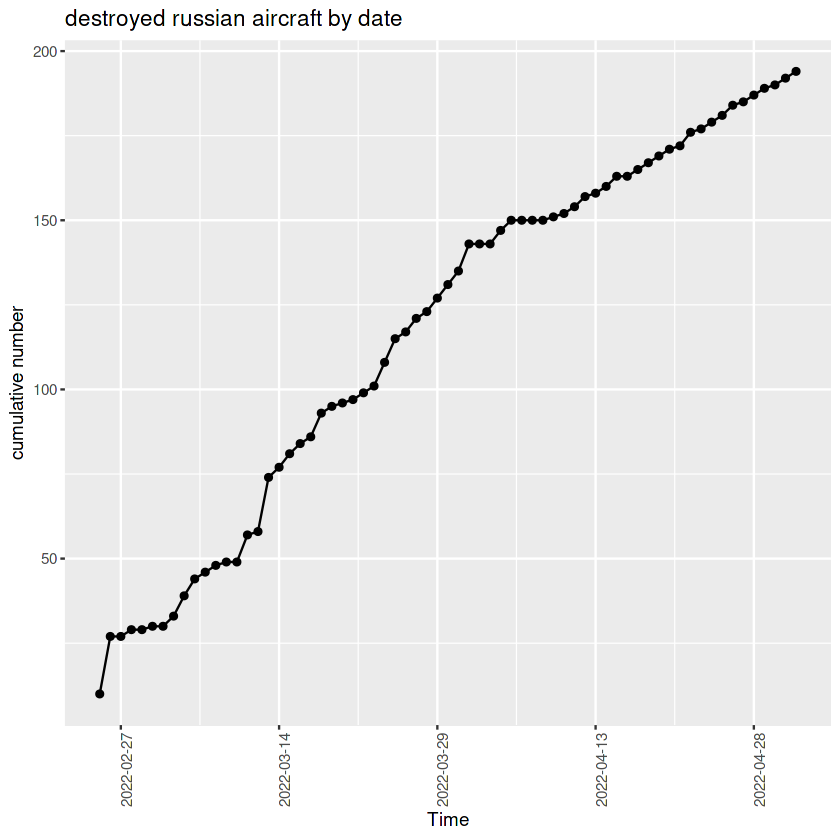

In [31]:
ggplot(data = russia_losses_equipment1, aes(x = date, y = aircraft)) + 
  geom_line(aes(group = 1)) +
  geom_point(shape = 'circle') +
  labs(title = 'destroyed russian aircraft by date', x = 'Time', y = 'cumulative number') +
  scale_y_continuous(labels = scales::number_format(big.mark = ',')) +
  scale_x_date(breaks = '15 day') +
  theme(axis.text.x=element_text(angle=90,hjust=1))


Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


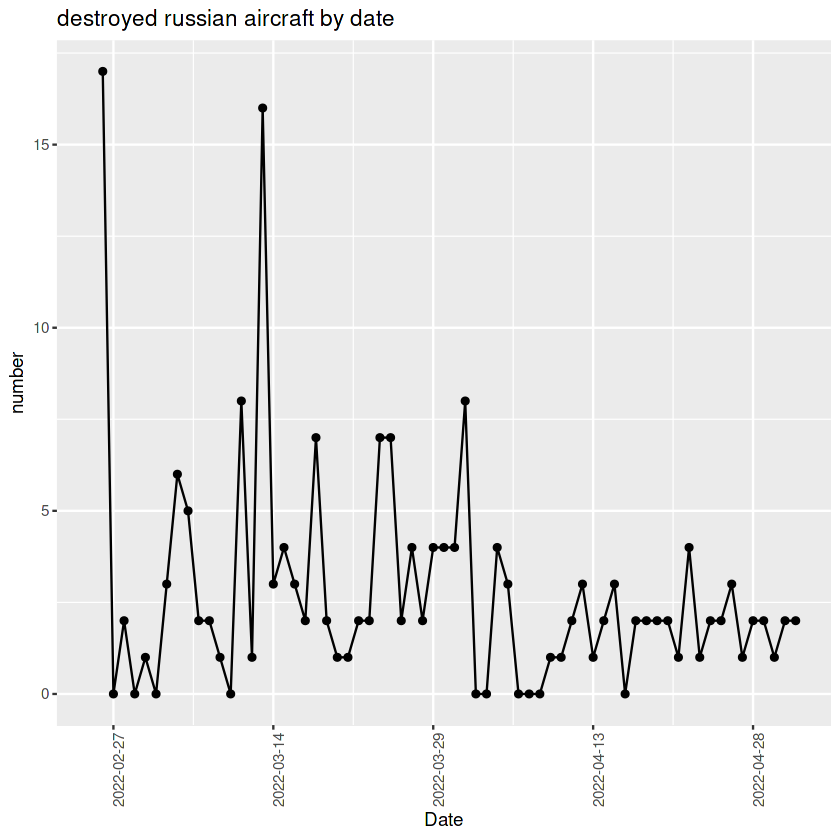

In [32]:
ggplot(data = russia_losses_equipment1, aes(x = date, y = aircraft_diff1)) + 
  geom_line(aes(group = 1)) +
  geom_point(shape = 'circle') +
  labs(title = 'destroyed russian aircraft by date', x = 'Date', y = 'number') +
  scale_y_continuous(labels = scales::number_format(big.mark = ',')) +
  scale_x_date(breaks = '15 day') +
  theme(axis.text.x=element_text(angle=90,hjust=1))


- `step3.` Time Series

- `step4.` Imputate Missing Values

- `step5` Reshaping the date frame and Time Series